# A minimal logic example

This example takes an input value and performs an exclusive or with the value `0xaa`, or the bit sequence `10101010` (MSB first).

Gate level display of `XOR` combinatorial logic (**not generated**!)
![XOR gate](https://www.electronicshub.org/wp-content/uploads/2015/07/exor-equivalent-circuit.jpg)

## Design stage

In [1]:
from myhdl import *

@block
def test(clk, a, b):
    @always_comb
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

### Question

What's missing in the above design?

## Translation stage

Translate source to the 'RTL' internal language.

In [2]:
from myhdl.conversion import yshelper

# Create top level signal instances:
clk = Signal(bool())
v, q = [ Signal(intbv()[8:]) for i in range(2) ]

# Create a yosys design:
design = yshelper.Design("test")
inst = test(clk, v, q)
inst.convert("yosys_module", design, name="test", trace=True)

CREATE Module: 'test'
Adding module with name: test_1_8_8
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
DONE instancing submodules


### RTL display

To display the synthesized logic circuit, we convert the design to a SVG image. By default, this displays the top level module circuits.

Generating RTL image...
Display...


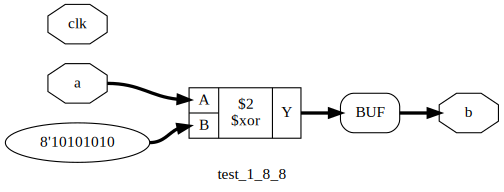

In [3]:
import config
from ys_aux import to_svg

display(to_svg(design, "", 75))

### Compare to VHDL/Verilog

Convert the `test` unit to V*:

1. Create signal top level instances

In [4]:
clk = Signal(bool())
v, q = [ Signal(intbv()[8:]) for i in range(2) ]

2. Instance the design unit:

In [5]:
instance = test(clk, v, q)
instance.convert("vhdl")

/home/pyosys/.local/lib/python3.7/site-packages/myhdl-0.11-py3.7.egg/myhdl/conversion/_toVHDL.py:408: ToVHDLWarning: Port is not used: clk
  category=ToVHDLWarning


We observe this has created a few VHDL files:

In [6]:
!ls *.vhd

pck_myhdl_011.vhd  test.vhd


In [7]:
!cat test.vhd

-- File: test.vhd
-- Generated by MyHDL 0.11
-- Date: Sun Jan 24 21:27:27 2021


library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;
use std.textio.all;

use work.pck_myhdl_011.all;

entity test is
    port (
        clk: in std_logic;
        a: in unsigned(7 downto 0);
        b: out unsigned(7 downto 0)
    );
end entity test;


architecture MyHDL of test is






begin





b <= (a xor to_unsigned(170, 8));

end architecture MyHDL;


### Exercise: Going synchronous

Questions:

* What would the logical behaviour be when making use of the `clk` signal?
* What is expected to be generated?

Fix up the [example](#Design-stage) by introducing a synchronous process decorator `@always(clk.posedge)`


### Next: [synchronous XOR](sync_logic.ipynb)